In [ ]:
#Veri Kümesini İçe Aktarma:
#!curl https://archive.org/dowload/ages-and-heights/AgesAndHeights.csv

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

### Veri Görselleştirme


In [ ]:
#Veri kümesini okumak ve onu raw_data adlı bir değişkende saklamak için kütüphaneyi içe aktarıyoruz  . 
#Daha sonra raw_data içeriğini tablo biçiminde görüntüleriz.

In [15]:
data = pd.read_csv('AgesAndHeights.csv')
print(data.head())

   Unnamed: 0        Age     Height
0           0  14.767874  59.627484
1           1   3.107671  36.146453
2           2   7.266917  46.912878
3           3   1.815180  29.125660
4           4  16.753758  68.170414


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Height'}>, <Axes: >]], dtype=object)

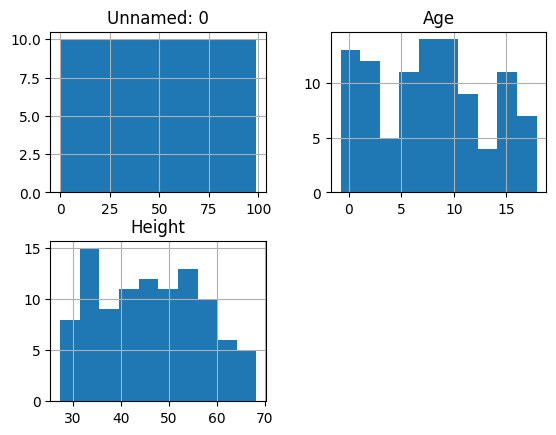

In [16]:
data.hist()

In [19]:
#Veri temizleme
data = data.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

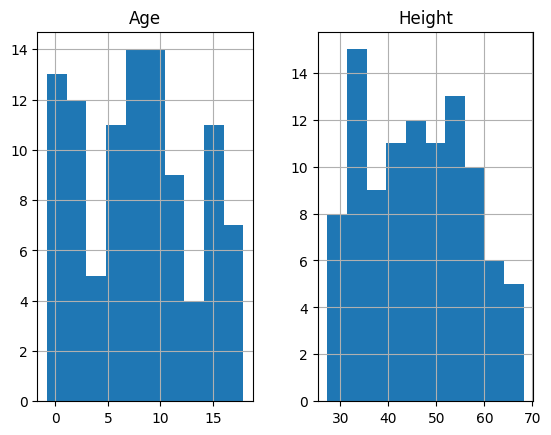

In [20]:
data.hist()

In [21]:
#Modeli geçerli kılmak için  yaşı 0 dan küçük olan girişleri temizleyelim.
cleanned_data=data[data['Age']>0]
cleanned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


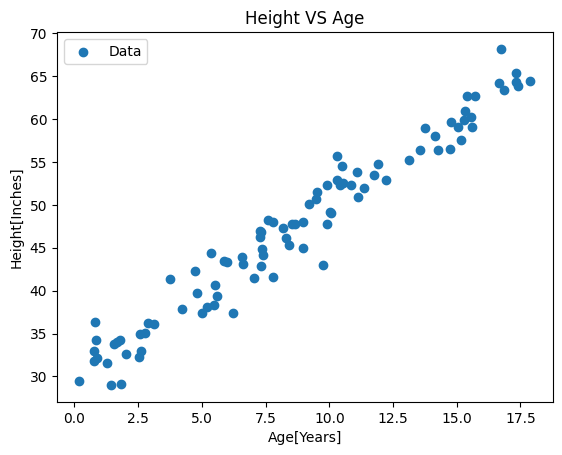

In [24]:
#Temzilenen verileri görslleştirme
ages=cleanned_data['Age']
heights=cleanned_data['Height']
plt.scatter(ages,heights,label='Data')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

####  X ekseninde Yaşı ve Y ekseninde Yüksekliği temsil ediyorum. Grafikteki noktalar Ham verilere atıfta bulunur.

In [25]:
#Modeli oluşturup eğitme
#ML Algoritmasının yani Basit Doğrusal Regresyonun devreye girdiği yer burasıdır.
parameters={'alpha':40,'beta':4}

def y_hat(age,params):
     alpha=params['alpha']
     beta=params['beta']
     return alpha + beta * age
y_hat(5,parameters)

60

In [26]:
def learn_parameters(data,params):
     x,y=data['Age'],data['Height']
     x_bar,y_bar=x.mean(),y.mean()
     beta=sum((x-x_bar)* (y-y_bar)) / ((x-x_bar)**2) 
     alpha=y_bar - beta * x_bar
     params['alpha']=alpha
     params['beta']=beta

In [27]:
new_parameter={'alpha':0 ,'beta':0}
learn_parameters(cleanned_data,new_parameter)
new_parameter

{'alpha': 0      -981.074327
 1     -1253.872100
 2    -22158.611779
 3      -805.112738
 4      -541.427279
           ...     
 95   -24186.698886
 96    -4295.274971
 97    -1052.229589
 98    -4093.763675
 99    -1868.582283
 Name: Age, Length: 93, dtype: float64,
 'beta': 0      119.629530
 1      151.367946
 2     2583.511438
 3       99.157434
 4       68.479182
          ...     
 95    2819.467443
 96     505.217279
 97     127.908026
 98     481.772625
 99     222.885860
 Name: Age, Length: 93, dtype: float64}

##### Learn_parameters işlevi, temizlenmiş_veriyi ve alfa ve beta için herhangi bir değere sahip olabilen sahte bir yeni_parametre sözlüğünü  alır  . Yani bunları parametrelere ve fonksiyon çalıştırmalarına argüman olarak aktardığımızda sırasıyla 30 ve 2'ye yakın bulunan doğru alfa ve beta değerini elde edebilir ve eski değerleri yenileriyle değiştirebiliriz.

In [28]:
new_parameter={'alpha':-2 ,'beta':1000}
learn_parameters(cleanned_data,new_parameter)
new_parameter

{'alpha': 0      -981.074327
 1     -1253.872100
 2    -22158.611779
 3      -805.112738
 4      -541.427279
           ...     
 95   -24186.698886
 96    -4295.274971
 97    -1052.229589
 98    -4093.763675
 99    -1868.582283
 Name: Age, Length: 93, dtype: float64,
 'beta': 0      119.629530
 1      151.367946
 2     2583.511438
 3       99.157434
 4       68.479182
          ...     
 95    2819.467443
 96     505.217279
 97     127.908026
 98     481.772625
 99     222.885860
 Name: Age, Length: 93, dtype: float64}

#####  Alfa ve beta değerlerini doğru bir şekilde bulduk ve bundan sonraki hedefimiz veriyi eğitmek. Ama eğitimsiz tahmin edilen değerlerin ne ölçüde doğru olduğunu söyleyeyim.

In [29]:
spaced_ages=list(range(19))
spaced_untrained_predictions=[y_hat(x,parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


##### 0'dan 18'e (son - 1) kadar değerleri olan space_ages adlı bir liste kullanıyorum . Daha sonra yükseklik için öngörülen değerleri içeren  spaced_untrained_predictions adlı başka bir liste,  bunu tahmin etmek için daha önce tanımlanan y_hat işlevini kullanır. Bu değerler bir grafikte çizilir ve görselleştirilir.

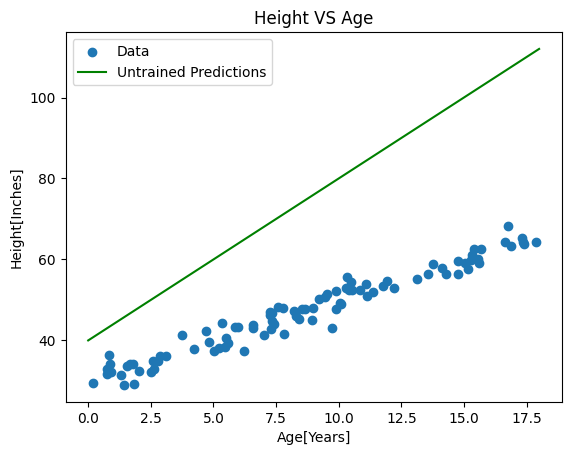

In [30]:
ages=cleanned_data['Age']
heights=cleanned_data['Height']
plt.scatter(ages,heights,label='Data')
plt.plot(spaced_ages,spaced_untrained_predictions,label='Untrained Predictions', color='green')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

##### Yeşil çizgi, spaced_untrained_predictions'ın gerçek  değerlerden büyük ölçüde saptığını ve doğruluğunun çok zayıf olduğunu gösteriyor. Bu nedenle, verileri eğitmemiz gereken doğruluğun arttırılması gerekiyor.